In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 비씨카드.csv

bc_data = pd.read_csv('금융빅데이터공모전_데이터/비씨카드.csv', encoding='cp949')
bc_data.head()

,매출년월,지역(구),지역(동),성별,연령대,업종코드,업종명,신용/체크 구분,건수,금액
0,201901,종로구,가회동,남,30대,8021,스넥,신용,102,1802700
1,201901,종로구,가회동,남,40대,8006,서양음식,신용,682,8618430
2,201901,종로구,가회동,남,40대,8021,스넥,신용,96,1478200
3,201901,종로구,가회동,여,20대,4010,편 의 점,체크,959,3940140
4,201901,종로구,가회동,여,20대,8006,서양음식,신용,395,5641840


In [3]:
# 지역 별 건수, 금액 파악
# aggfunc를 mean, sum 둘 중 어떤 것으로 사용?
# value 를 '건수', '금액' 둘 중 어떤 것으로 사용?
# 우선, sum, '건수' 기준으로 분석 수행

bc_temp_df = bc_data.pivot_table(index='지역(동)',
                                 aggfunc='sum',
                                 values=['건수', '금액'])
bc_temp_df.reset_index(inplace=True)
bc_temp_df.columns = ['지역(동)', '전체 건수', '전체 금액']
bc_temp_df

,지역(동),전체 건수,전체 금액
0,가회동,220620,3314908263
1,광희동,959441,12508385847
2,교남동,177947,1593641202
3,다산동,345441,4742767113
4,동화동,125242,1321415428
5,명동,2416652,32963768366
6,무악동,72772,677782614
7,부암동,250023,2929990336
8,사직동,1098947,16319579769
9,삼청동,298538,4701072869


In [4]:
# 2030 지역 별 건수, 금액 파악

bc_temp = bc_data[bc_data.연령대.isin(['20대', '30대'])]
bc_temp_df2 = bc_temp.pivot_table(index='지역(동)',
                                  aggfunc='sum',
                                  values=['건수', '금액'])
bc_temp_df2.reset_index(inplace=True)
bc_temp_df2

,지역(동),건수,금액
0,가회동,122407,1540141900
1,광희동,562805,6175238546
2,교남동,79273,600870826
3,다산동,190044,2122652166
4,동화동,60572,517658014
5,명동,1452520,17004941606
6,무악동,29991,229215642
7,부암동,166155,1317384765
8,사직동,595113,7017732425
9,삼청동,163844,2229749608


In [5]:
kt_data = pd.read_excel('금융빅데이터공모전_데이터/KT_유동인구.xlsx', sheet_name = '유동인구 데이터')
kt_code = pd.read_excel('금융빅데이터공모전_데이터/KT_행정동 코드 데이터.xlsx', sheet_name = 'KT_지역코드')

In [6]:
kt_merge_data = pd.merge(kt_data, kt_code, on='AMD_CD', how='inner')
kt_merge_data.head()

,AMD_CD,etl_ymd,timezn_cd,m00,m10,m15,m20,m25,m30,m35,...,f65,f70,m_total,w_total,total,SIDO_CD,SIDO_NM,SGG_CD,SGG_NM,AMD_NM
0,11110515,20190601,0,0,0,41,145,340,231,200,...,5,23,1598,912,2510,11,서울특별시,11110,종로구,청운효자동
1,11110515,20190601,1,0,0,22,136,210,156,168,...,0,14,1233,581,1814,11,서울특별시,11110,종로구,청운효자동
2,11110515,20190601,2,0,0,17,129,218,135,162,...,6,16,1268,839,2107,11,서울특별시,11110,종로구,청운효자동
3,11110515,20190601,3,0,0,51,90,137,73,138,...,6,18,830,586,1416,11,서울특별시,11110,종로구,청운효자동
4,11110515,20190601,4,0,0,8,95,114,104,107,...,7,4,782,512,1294,11,서울특별시,11110,종로구,청운효자동


In [7]:
# 지역별 전체 유동인구 mean or sum

kt_temp_1 = kt_merge_data.pivot_table(index='AMD_NM',
                                     aggfunc='mean',
                                     values='total'
                                     ).sort_values(by='total', ascending=False)
kt_temp_1

,total
AMD_NM,
종로1.2.3.4가동,90954.870833
명동,68862.898611
소공동,56599.701389
회현동,56378.104167
광희동,38652.898611
사직동,37373.052778
신당동,31900.677778
이화동,30595.966667
필동,27155.672222


In [8]:
# 지역별 2030 유동인구 mean or sum

kt_cols = kt_merge_data.columns[3:-5]

kt_temp_1 = kt_merge_data.pivot_table(index='AMD_NM',
                                      aggfunc='mean',
                                      values=kt_cols
                                      ).sort_values(by='total', ascending=False)
kt_temp_1['2030_m_total'] = kt_temp_1.m20 + \
    kt_temp_1.m25 + kt_temp_1.m30 + kt_temp_1.m35
kt_temp_1['2030_w_total'] = kt_temp_1.f20 + \
    kt_temp_1.f25 + kt_temp_1.f30 + kt_temp_1.f35
kt_temp_1['2030_total'] = kt_temp_1['2030_m_total'] + kt_temp_1['2030_w_total']
kt_temp_2 = kt_temp_1.loc[:, ['m20', 'm25', 'm30', 'm35', '2030_m_total', 'f20', 'f25', 'f30', 'f35', '2030_w_total',
                              '2030_total', 'm_total', 'w_total', 'total']][['2030_m_total', '2030_w_total', '2030_total',
                                                      'm_total', 'w_total', 'total']].sort_values(by='2030_total',
                                                                                                                           ascending=False)
kt_temp_2.reset_index(inplace=True)
kt_temp_2

# 남성보다는 여성의 수가 상대적으로 많음

,AMD_NM,2030_m_total,2030_w_total,2030_total,m_total,w_total,total
0,종로1.2.3.4가동,22398.416667,21291.009722,43689.426389,51660.969444,39293.901389,90954.870833
1,명동,17581.187500,19487.676389,37068.863889,36624.556944,32238.341667,68862.898611
2,소공동,13663.962500,13805.333333,27469.295833,30742.765278,25856.936111,56599.701389
3,회현동,12835.547222,12591.683333,25427.230556,29841.645833,26536.458333,56378.104167
4,광희동,9559.644444,10553.251389,20112.895833,19435.905556,19216.993056,38652.898611
5,사직동,8518.747222,8742.841667,17261.588889,20470.094444,16902.958333,37373.052778
6,이화동,7221.145833,8927.897222,16149.043056,14475.345833,16120.620833,30595.966667
7,신당동,8465.037500,7105.838889,15570.876389,16752.200000,15148.477778,31900.677778
8,혜화동,6655.048611,7559.938889,14214.987500,12265.212500,12734.615278,24999.827778
9,필동,7081.738889,6338.304167,13420.043056,15685.086111,11470.586111,27155.672222


In [9]:
# 전체 연령대 대비 20대, 30대, 40대 비율 추출

kt_temp_1 = kt_merge_data.pivot_table(index='AMD_NM',
                                      aggfunc='mean',
                                      values=kt_cols
                                      ).sort_values(by='total', ascending=False)
kt_temp_1['20_total'] = kt_temp_1.m20 + \
    kt_temp_1.m25 + kt_temp_1.f20 + kt_temp_1.f25
kt_temp_1['20_total'] = kt_temp_1['20_total'] / kt_temp_1['total']
kt_temp_1['30_total'] = kt_temp_1.m30 + \
    kt_temp_1.m35 + kt_temp_1.f30 + kt_temp_1.f35
kt_temp_1['30_total'] = kt_temp_1['30_total'] / kt_temp_1['total']
kt_temp_1['2030_total_비율'] = kt_temp_1['20_total'] + kt_temp_1['30_total']
kt_temp_1['40_total'] = kt_temp_1.m40 + \
    kt_temp_1.m45 + kt_temp_1.f40 + kt_temp_1.f45
kt_temp_1['40_total'] = kt_temp_1['40_total'] / kt_temp_1['total']

kt_temp_3 = kt_temp_1[['20_total', '30_total', '2030_total_비율', '40_total', 'total']].sort_values(
    by='total', ascending=False)
kt_temp_3.reset_index(inplace=True)
kt_temp_3 = kt_temp_3[['AMD_NM', '20_total', '30_total', '2030_total_비율', '40_total']]
kt_temp_3

,AMD_NM,20_total,30_total,2030_total_비율,40_total
0,종로1.2.3.4가동,0.254721,0.225620,0.480342,0.185522
1,명동,0.270462,0.267838,0.538299,0.195848
2,소공동,0.215878,0.269448,0.485326,0.220840
3,회현동,0.198481,0.252532,0.451013,0.214621
4,광희동,0.269590,0.250756,0.520346,0.173898
5,사직동,0.215562,0.246311,0.461873,0.215626
6,신당동,0.229890,0.258214,0.488105,0.174785
7,이화동,0.308874,0.218942,0.527816,0.153099
8,필동,0.287627,0.206562,0.494189,0.183522
9,을지로동,0.201959,0.221789,0.423748,0.194999


In [10]:
mango_user_data = pd.read_excel('금융빅데이터공모전_데이터/망고플레이트_사용자 밀집도.xlsx', sheet_name='데이터')
mango_fran_data = pd.read_excel('금융빅데이터공모전_데이터/망고플레이트_가맹점 정보.xlsx', sheet_name='데이터')

In [11]:
# 요식업 수 데이터
new_df = pd.read_excel('금융빅데이터공모전_데이터/외식업 점포수.xlsx', sheet_name='Sheet1')
new_df.loc[3:]

,행정구역,전체 점포수,프렌차이즈 점포수,일반 점포수
3,청운효자동,284,10,274
4,사직동,980,139,841
5,삼청동,275,30,245
6,부암동,124,18,106
7,평창동,162,19,143
8,무악동,38,13,25
9,교남동,113,24,89
10,가회동,222,30,192
11,종로1.2.3.4가동,2579,372,2207
12,종로5.6가동,573,74,499


In [12]:
# 서울시 사업체 창업률 데이터

new_df2 = pd.read_csv('금융빅데이터공모전_데이터/report.txt', sep='\t', thousands=',')
new_df2 = new_df2[new_df2.동 != '계']
new_df2 = new_df2[new_df2.동 != '합계']
new_df2 = new_df2[new_df2.자치구.isin(['종로구', '중구'])]
new_df2

,기간,자치구,동,사업체수,종사자수,평균종사자,사업체 창업률
2,2017,종로구,사직동,3544,52489,14.81,10.50
3,2017,종로구,삼청동,753,4507,5.99,11.82
4,2017,종로구,부암동,567,4147,7.31,9.70
5,2017,종로구,평창동,739,3547,4.80,11.50
6,2017,종로구,무악동,531,1457,2.74,4.90
7,2017,종로구,교남동,347,3816,11.00,23.34
8,2017,종로구,가회동,747,13681,18.31,12.45
9,2017,종로구,종로1.2.3.4가동,15851,111270,7.02,7.74
10,2017,종로구,종로5.6가동,7613,23581,3.10,7.76
11,2017,종로구,이화동,1289,17511,13.58,13.11


In [95]:
# 서울시 식품위생업

new_df3 = pd.read_csv('금융빅데이터공모전_데이터/report2.txt', sep='\t', thousands=',')
new_df3 = new_df3[new_df3.동 != '계']
new_df3 = new_df3[new_df3.동 != '합계']
new_df3 = new_df3[new_df3.동 != '동']
new_df3 = new_df3[new_df3.동 != '기타']
new_df3 = new_df3[new_df3.자치구.isin(['종로구', '중구'])]
new_df3 = new_df3[['동', '식품접객업']] 
new_df3.columns = ['동이름', '식품 사업체수']
new_df3

,동이름,식품 사업체수
3,사직동,1257
4,삼청동,362
5,부암동,204
6,평창동,216
7,무악동,56
8,교남동,163
9,가회동,270
10,종로1.2.3.4가동,3136
11,종로5.6가동,725
12,이화동,503


In [13]:
# 주소 끝부분만 빼내서 리뷰 수 평균 or 합 도출

mango_fran_data['sub_address'] = mango_fran_data.address.str.replace(r'\w+ \w+ (\w+)', lambda x: x.group(1))
#mango_fran_data['sub_address'] = mango_fran_data.sub_address.str.extract(r'([가-힣]+)\d*([가-힣]*)')
#mango_fran_data['sub_address'] = [w + '동' if '동' not in w else w for w in mango_fran_data['sub_address']]
mango_fran_data.sub_address

#temp_mango_data = mango_fran_data.pivot_table(index='sub_address',
#                            aggfunc='sum',
#                            values='review_count').sort_values(by='review_count', ascending=False)

#temp_mango_data.reset_index(inplace=True)
#temp_mango_data

0       필동3가 
1         신당동
2        관철동 
3        숭인동 
4         무교동
5         수표동
6        익선동 
7         방산동
8       인현동1가
9         다동 
10        수표동
11       청진동 
12        신당동
13       내수동 
14        소공동
15       낙원동 
16       관철동 
17       창성동 
18       명륜3가
19       혜화동 
20       이화동 
21         계동
22        남창동
23       공평동 
24      명동2가 
25      을지로2가
26      서소문동 
27      신문로2가
28       혜화동 
29        신당동
        ...  
2970      신당동
2971    을지로6가
2972     관철동 
2973     청진동 
2974     누하동 
2975     원남동 
2976     옥인동 
2977    태평로1가
2978      소공동
2979    신문로2가
2980      황학동
2981     사직동 
2982    을지로2가
2983      남대문
2984    을지로2가
2985     인사동 
2986      소공동
2987    명동1가 
2988     통인동 
2989     인의동 
2990     관철동 
2991    을지로6가
2992      수표동
2993    명동2가 
2994     명륜4가
2995    을지로7가
2996      소공동
2997      남대문
2998     종로2가
2999    필동3가 
Name: sub_address, Length: 3000, dtype: object

In [14]:
# 전체 or 2030 파생변수 추가

# 동별 전체 금액/건수 대비 여성 금액/건수 비율 계산용
bc_temp = bc_data[bc_data.연령대.isin(['20대', '30대'])]
bc_temp_df3 = bc_temp.pivot_table(index='지역(동)',
                                  columns='성별',
                                 aggfunc='sum',
                                 values=['건수', '금액'])

bc_temp_df4 = bc_data.pivot_table(index='지역(동)',
                                  columns='성별',
                                  aggfunc='sum',
                                  values=['건수', '금액'])

bc_temp_df3.reset_index(inplace=True)
bc_temp_df3['건수 여성 비율'] = bc_temp_df3[('건수', '여')] / (bc_temp_df3[('건수', '남')] + bc_temp_df3[('건수', '여')])
bc_temp_df3['금액 여성 비율'] = bc_temp_df3[('금액', '여')] / (bc_temp_df3[('금액', '남')] + bc_temp_df3[('금액', '여')])
bc_temp_df3 = bc_temp_df3[['지역(동)', '건수 여성 비율', '금액 여성 비율']]
bc_temp_df3.columns = bc_temp_df3.columns.get_level_values(0)

bc_temp_df4.reset_index(inplace=True)
bc_temp_df4['전체 건수 여성 비율'] = bc_temp_df4[('건수', '여')] / (bc_temp_df4[('건수', '남')] + bc_temp_df4[('건수', '여')])
bc_temp_df4['전체 금액 여성 비율'] = bc_temp_df4[('금액', '여')] / (bc_temp_df4[('금액', '남')] + bc_temp_df4[('금액', '여')])
bc_temp_df4 = bc_temp_df4[['지역(동)', '전체 건수 여성 비율', '전체 금액 여성 비율']]
bc_temp_df4.columns = bc_temp_df4.columns.get_level_values(0)

bc_temp_df4

,지역(동),전체 건수 여성 비율,전체 금액 여성 비율
0,가회동,0.491719,0.480782
1,광희동,0.464328,0.423092
2,교남동,0.501554,0.500004
3,다산동,0.466650,0.434545
4,동화동,0.422247,0.427397
5,명동,0.489170,0.468748
6,무악동,0.467281,0.455583
7,부암동,0.489247,0.444561
8,사직동,0.485032,0.433159
9,삼청동,0.541717,0.518643


In [15]:
# 한식 대비 양식 비율 데이터 만들기

bc_temp = bc_data[bc_data.연령대.isin(['20대', '30대'])]
bc_temp_df5 = bc_temp.pivot_table(index='지역(동)',
                                  columns='업종명',
                                  aggfunc='sum',
                                  values=['건수', '금액'])
#display(bc_temp_df5)
bc_temp_df5['건수 서양/한식 비율'] = bc_temp_df5[('건수', '서양음식')] / bc_temp_df5[('건수', '일반한식')]
bc_temp_df5['금액 서양/한식 비율'] = bc_temp_df5[('금액', '서양음식')] / bc_temp_df5[('금액', '일반한식')]
bc_temp_df5['건수 서양한식스넥/편의점 비율'] = (bc_temp_df5[('건수', '서양음식')] + bc_temp_df5[('건수', '일반한식')]
                                   + bc_temp_df5[('건수', '스넥')]) / bc_temp_df5[('건수', '편 의 점')]
bc_temp_df5['금액 서양한식스넥/편의점 비율'] = (bc_temp_df5[('금액', '서양음식')] + bc_temp_df5[('금액', '일반한식')]
                                   + bc_temp_df5[('금액', '스넥')]) / bc_temp_df5[('금액', '편 의 점')]
bc_temp_df5.reset_index(inplace=True)
bc_temp_df5 = bc_temp_df5[['지역(동)', '건수 서양/한식 비율', '금액 서양/한식 비율', '건수 서양한식스넥/편의점 비율',
                          '금액 서양한식스넥/편의점 비율']]
bc_temp_df5.columns = bc_temp_df5.columns.get_level_values(0)
bc_temp_df5

,지역(동),건수 서양/한식 비율,금액 서양/한식 비율,건수 서양한식스넥/편의점 비율,금액 서양한식스넥/편의점 비율
0,가회동,1.646768,1.013470,2.272827,7.671496
1,광희동,1.491584,0.891745,1.458082,3.639705
2,교남동,2.626027,1.333560,0.625513,1.089374
3,다산동,0.797884,0.289053,0.795969,2.496436
4,동화동,1.046575,0.484021,0.590401,1.694068
5,명동,1.319896,0.641727,2.031730,4.637155
6,무악동,1.965482,1.343150,0.772204,1.509335
7,부암동,1.976113,0.776753,0.951298,2.624979
8,사직동,1.257749,0.597651,2.337931,7.258219
9,삼청동,2.203033,1.309761,3.270663,8.306950


In [16]:
# 거주인구 데이터

pop_data = pd.read_excel('금융빅데이터공모전_데이터/거주인구.xls', sheet_name='Sheet1')
pop_data = pop_data[pop_data.자치구.isin(['종로구', '중구'])][pop_data.행정동 != '소계']
pop_data = pop_data[['행정동', '세대', '인구', '세대당인구', '65세이상고령자']]
pop_data

C:\Users\samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,행정동,세대,인구,세대당인구,65세이상고령자
4,사직동,4557,9700,2.07,1773
5,삼청동,1397,3013,1.98,650
6,부암동,4268,10525,2.35,1754
7,평창동,7518,18830,2.48,3220
8,무악동,3177,8745,2.74,1402
9,교남동,4581,10779,2.32,1558
10,가회동,2056,4487,2.13,916
11,종로1.2.3.4가동,5275,8630,1.39,1916
12,종로5.6가동,3231,5717,1.61,1102
13,이화동,4473,8566,1.77,1368


In [17]:
# 동별 주차장 수

p_data = pd.read_excel('금융빅데이터공모전_데이터/동별 주차장.xls', sheet_name='Sheet1')
p_data = p_data[p_data.자치구.isin(['종로구', '중구'])][p_data.동 != '소계']
p_data = p_data[['동', '합계', '합계.1', '건축물부설', '건축물부설.1']]
p_data

C:\Users\samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,동,합계,합계.1,건축물부설,건축물부설.1
4,사직동,379,15562,354,13795
5,삼청동,214,2064,192,1753
6,부암동,616,3522,607,3389
7,평창동,1645,9587,1623,9117
8,무악동,32,2891,32,2891
9,교남동,135,1429,130,1343
10,가회동,258,2787,247,2545
11,종로1.2.3.4가동,612,18736,565,15984
12,종로5.6가동,455,5094,436,4301
13,이화동,452,10252,432,9908


In [96]:
# 데이터 통합(2030)

merge_data = pd.merge(bc_temp_df2,kt_temp_2, left_on='지역(동)', right_on='AMD_NM', how='inner')  # 2030 bc, kt
merge_data = pd.merge(merge_data, bc_temp_df, on='지역(동)', how='inner')  # 전체 bc
merge_data = pd.merge(merge_data, bc_temp_df3, on='지역(동)', how='inner')  # 2030 여성 비율
merge_data = pd.merge(merge_data, bc_temp_df4, on='지역(동)', how='inner')  # 전체 여성 비율
merge_data = pd.merge(merge_data, new_df.loc[3:], left_on='지역(동)', right_on='행정구역', how='outer')  # 요식업 수
merge_data = pd.merge(merge_data, new_df2[['동', '사업체수', '사업체 창업률']], left_on='지역(동)', 
                      right_on='동', how='outer')  # 사업체 수, 사업체 창업률
merge_data = pd.merge(merge_data, new_df3, left_on='지역(동)', 
                      right_on='동이름', how='outer')  # 사업체 수, 사업체 창업률
merge_data = pd.merge(merge_data, kt_temp_3, left_on='지역(동)', right_on='AMD_NM', how='inner')  # 20, 30, 40 매출 비율
merge_data = pd.merge(merge_data, pop_data, left_on='지역(동)', right_on='행정동', how='outer')  # 동별 거주인구
merge_data = pd.merge(merge_data, p_data, left_on='지역(동)', right_on='동', how='outer')  # 동별 주차장, 건축물 수
merge_data = pd.merge(merge_data, bc_temp_df5, on='지역(동)', how='outer')  # 서양/한식 비율

merge_data.drop(['AMD_NM_x', 'AMD_NM_y', '행정구역', '동_x', '동_y', '행정동', '동이름'], axis=1, inplace=True)
#merge_data['지역(동)'] = merge_data['지역(동)'].str.extract(r'([가-힣]+)\d*([가-힣]*)')
#merge_data['지역(동)'] = [w + '동' if '동' not in w else w for w in merge_data['지역(동)']]
#merge_data = merge_data.groupby('지역(동)').sum().reset_index()
#merge_data = pd.merge(merge_data, temp_mango_data, left_on='지역(동)', right_on='sub_address', how='inner')
# merge_data[(merge_data.sub_address.isna()) | (merge_data.건수.isna())]
pd.set_option('display.max_columns', 100)
merge_data

# 데이터 추가 or 컬럼 추가 필요

,지역(동),건수,금액,2030_m_total,2030_w_total,2030_total,m_total,w_total,total,전체 건수,전체 금액,건수 여성 비율,금액 여성 비율,전체 건수 여성 비율,전체 금액 여성 비율,전체 점포수,프렌차이즈 점포수,일반 점포수,사업체수,사업체 창업률,식품 사업체수,20_total,30_total,2030_total_비율,40_total,세대,인구,세대당인구,65세이상고령자,합계,합계.1,건축물부설,건축물부설.1,건수 서양/한식 비율,금액 서양/한식 비율,건수 서양한식스넥/편의점 비율,금액 서양한식스넥/편의점 비율
0,가회동,122407,1540141900,2102.116667,1600.326389,3702.443056,4380.162500,3062.712500,7442.875000,220620,3314908263,0.527944,0.544272,0.491719,0.480782,222,30,192,747,12.45,270,0.221087,0.276361,0.497448,0.198808,2056,4487,2.13,916,258,2787,247,2545,1.646768,1.013470,2.272827,7.671496
1,광희동,562805,6175238546,9559.644444,10553.251389,20112.895833,19435.905556,19216.993056,38652.898611,959441,12508385847,0.512508,0.488891,0.464328,0.423092,800,130,670,9253,8.33,1005,0.269590,0.250756,0.520346,0.173898,2943,6221,1.68,1166,278,9944,254,7749,1.491584,0.891745,1.458082,3.639705
2,교남동,79273,600870826,2156.118056,2202.948611,4359.066667,5806.675000,5131.643056,10938.318056,177947,1593641202,0.543060,0.555161,0.501554,0.500004,113,24,89,347,23.34,163,0.194599,0.203915,0.398513,0.204955,4581,10779,2.32,1558,135,1429,130,1343,2.626027,1.333560,0.625513,1.089374
3,다산동,190044,2122652166,2785.790278,2707.390278,5493.180556,6511.759722,5475.997222,11987.756944,345441,4742767113,0.499358,0.467794,0.466650,0.434545,210,41,169,1396,11.03,129,0.226031,0.232201,0.458233,0.182520,6950,15075,2.09,2531,658,4735,637,4152,0.797884,0.289053,0.795969,2.496436
4,동화동,60572,517658014,1430.419444,1404.226389,2834.645833,3706.252778,3365.265278,7071.518056,125242,1321415428,0.443968,0.441098,0.422247,0.427397,116,24,92,938,8.85,79,0.180689,0.220165,0.400854,0.188036,4153,11064,2.62,1734,246,4162,239,4120,1.046575,0.484021,0.590401,1.694068
5,명동,1452520,17004941606,17581.187500,19487.676389,37068.863889,36624.556944,32238.341667,68862.898611,2416652,32963768366,0.555170,0.548619,0.489170,0.468748,1524,322,1202,6770,9.93,1847,0.270462,0.267838,0.538299,0.195848,1441,3497,1.97,732,298,14525,275,13893,1.319896,0.641727,2.031730,4.637155
6,무악동,29991,229215642,631.881944,625.563889,1257.445833,1955.540278,1923.183333,3878.723611,72772,677782614,0.471908,0.447388,0.467281,0.455583,38,13,25,531,4.90,56,0.161301,0.162890,0.324191,0.193149,3177,8745,2.74,1402,32,2891,32,2891,1.965482,1.343150,0.772204,1.509335
7,부암동,166155,1317384765,1889.179167,1540.954167,3430.133333,5120.266667,3806.727778,8926.994444,250023,2929990336,0.503151,0.467127,0.489247,0.444561,124,18,106,567,9.70,204,0.209103,0.175140,0.384243,0.199144,4268,10525,2.35,1754,616,3522,607,3389,1.976113,0.776753,0.951298,2.624979
8,사직동,595113,7017732425,8518.747222,8742.841667,17261.588889,20470.094444,16902.958333,37373.052778,1098947,16319579769,0.546283,0.525840,0.485032,0.433159,980,139,841,3544,10.50,1257,0.215562,0.246311,0.461873,0.215626,4557,9700,2.07,1773,379,15562,354,13795,1.257749,0.597651,2.337931,7.258219
9,삼청동,163844,2229749608,2381.841667,2069.033333,4450.875000,5356.394444,4192.054167,9548.448611,298538,4701072869,0.587779,0.572026,0.541717,0.518643,275,30,245,753,11.82,362,0.231567,0.234569,0.466136,0.201049,1397,3013,1.98,650,214,2064,192,1753,2.203033,1.309761,3.270663,8.306950


In [19]:
# null값 탐색

for col in merge_data:
    print('-----%s-----' %col)
    print(merge_data[col].value_counts().value_counts())
    print()

-----지역(동)-----
1    32
Name: 지역(동), dtype: int64

-----건수-----
1    32
Name: 건수, dtype: int64

-----금액-----
1    32
Name: 금액, dtype: int64

-----2030_m_total-----
1    32
Name: 2030_m_total, dtype: int64

-----2030_w_total-----
1    32
Name: 2030_w_total, dtype: int64

-----2030_total-----
1    32
Name: 2030_total, dtype: int64

-----m_total-----
1    32
Name: m_total, dtype: int64

-----w_total-----
1    32
Name: w_total, dtype: int64

-----total-----
1    32
Name: total, dtype: int64

-----전체 건수-----
1    32
Name: 전체 건수, dtype: int64

-----전체 금액-----
1    32
Name: 전체 금액, dtype: int64

-----건수 여성 비율-----
1    32
Name: 건수 여성 비율, dtype: int64

-----금액 여성 비율-----
1    32
Name: 금액 여성 비율, dtype: int64

-----전체 건수 여성 비율-----
1    32
Name: 전체 건수 여성 비율, dtype: int64

-----전체 금액 여성 비율-----
1    32
Name: 전체 금액 여성 비율, dtype: int64

-----전체 점포수-----
1    30
2     1
Name: 전체 점포수, dtype: int64

-----프렌차이즈 점포수-----
1    21
2     4
3     1
Name: 프렌차이즈 점포수, dtype: int64

-----일반 점포수-----
1    32
Name

In [20]:
# 전처리 - 표준화 작업

from sklearn.preprocessing import StandardScaler

cols = ['전체 금액', 'total', '사업체수', '사업체 창업률']
scaler = StandardScaler()
merge_data_scaled = pd.DataFrame(scaler.fit_transform(merge_data[cols]),
                               columns=cols)
merge_data_scaled

,전체 금액,total,사업체수,사업체 창업률
0,-0.422290,-0.739857,-0.630884,0.803084
1,0.173305,0.789945,1.528538,-0.491750
2,-0.533802,-0.568523,-0.732432,4.225594
3,-0.329787,-0.517083,-0.466122,0.356806
4,-0.551438,-0.758059,-0.582395,-0.328324
5,1.498496,2.270729,0.898178,0.011098
6,-0.593135,-0.914558,-0.685720,-1.569731
7,-0.447227,-0.667110,-0.676581,-0.061186
8,0.420211,0.727212,0.079192,0.190238
9,-0.332488,-0.636649,-0.629361,0.605087


In [21]:
# 회귀분석

import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = merge_data[['사업체수', '20_total', '40_total']]
y = merge_data['전체 금액']

# test, train 분리
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=100)

# 학습
X_train = sm.add_constant(X_train)
reg = sm.OLS(y_train, X_train).fit()

# 모델 적용
X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)

# 결과
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  전체 금액   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     5.938
Date:                Mon, 18 Nov 2019   Prob (F-statistic):            0.00425
Time:                        15:33:14   Log-Likelihood:                -616.16
No. Observations:                  25   AIC:                             1240.
Df Residuals:                      21   BIC:                             1245.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.108e+11   4.36e+10     -2.544      0.0

C:\Users\samsung\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [22]:
# decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = merge_data[['total', '사업체수']]
y = merge_data['전체 금액']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=100)

# 1. 결정트리 객체 생성
dt_clf = DecisionTreeClassifier()

# 2. 결정트리로 학습 수행
dt_clf.fit(X_train, y_train)

# 3. 모델 평가
dt_clf.score(X_test, y_test)

0.0

In [23]:
# 망고플레이트 데이터 회귀분석

mango_fran_data = pd.read_excel('금융빅데이터공모전_데이터/망고플레이트_가맹점 정보.xlsx', sheet_name='데이터')
mango_data = mango_fran_data[~mango_fran_data.rating.isna()]
mango_data

,restaurant_name,restaurant_branch_name,address,latitude,longitude,price_range_code,parking_option_code,business_hour,day_off,menu_text,rating,review_count
3,학술적연구소,NaN,서울시 종로구 숭인동,37.576306,127.022494,2,3,18:00 - 01:00,일,전통 / 민속 주점,3.9,11
6,에일당,NaN,서울시 종로구 익선동,37.573549,126.990066,2,3,12:00 - 23:00,NaN,수제맥주 전문점,3.9,45
13,평가옥,광화문점,서울시 종로구 내수동,37.572783,126.974047,2,3,11:30 - 21:00,NaN,평양냉면 전문점,3.9,27
16,이춘복참치,종각점,서울시 종로구 관철동,37.568684,126.986740,5,3,"월-토: 11:30 - 01:30, 일: 13:30 - 23:30",NaN,참치 전문점,3.2,20
19,해마티룸,NaN,서울시 종로구 혜화동,37.586390,127.001603,1,3,12:00 - 22:30,NaN,카페,4.0,28
21,우리의밤,NaN,서울시 종로구 계동,37.583109,126.998223,2,3,18:00 - 03:00,NaN,칵테일 바,3.6,23
22,카페 피크닉,NaN,서울시 중구 남창동,37.556984,126.978129,1,4,10:00 - 24:00,월,카페,3.5,14
28,하이디라오,대학로점,서울시 종로구 혜화동,37.584266,127.002030,2,-1,NaN,NaN,기타 중식,4.1,12
31,절벽,NaN,서울시 종로구 평창동,37.609155,126.974338,2,3,17:00 - 04:00,첫째/셋째 일,포장마차형 주점,4.0,7
32,호랑이카레,NaN,서울시 종로구 계동,37.582303,126.986949,2,3,11:30 - 21:00,NaN,일식 카레 전문점,4.1,48


In [24]:
X = mango_data[['price_range_code', 'parking_option_code', 'review_count']]
y = mango_data['rating']

X = pd.concat([X, pd.get_dummies(X['price_range_code'], 
                                 prefix='price'), 
               pd.get_dummies(X['parking_option_code'], prefix='parking')], axis=1)  # drop_first=True
X.drop(['price_range_code', 'parking_option_code'], axis=1, inplace=True)
X

,review_count,price_1,price_2,price_3,price_4,price_5,parking_-1,parking_1,parking_2,parking_3,parking_4
3,11,0,1,0,0,0,0,0,0,1,0
6,45,0,1,0,0,0,0,0,0,1,0
13,27,0,1,0,0,0,0,0,0,1,0
16,20,0,0,0,0,1,0,0,0,1,0
19,28,1,0,0,0,0,0,0,0,1,0
21,23,0,1,0,0,0,0,0,0,1,0
22,14,1,0,0,0,0,0,0,0,0,1
28,12,0,1,0,0,0,1,0,0,0,0
31,7,0,1,0,0,0,0,0,0,1,0
32,48,0,1,0,0,0,0,0,0,1,0


In [25]:
# 회귀분석

import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# test, train 분리
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=20)

# 학습
X_train = sm.add_constant(X_train)
reg = sm.OLS(y_train, X_train).fit()

# 모델 적용
X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)

# 결과
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     13.15
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           3.14e-19
Time:                        15:33:17   Log-Likelihood:                -243.44
No. Observations:                 595   AIC:                             506.9
Df Residuals:                     585   BIC:                             550.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.6518      0.023    113.492   

C:\Users\samsung\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [26]:
def entropy(labels):
    """ Computes entropy of 0-1 vector. """
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    counts = np.bincount(labels)
    probs = counts[np.nonzero(counts)] / n_labels
    n_classes = len(probs)

    if n_classes <= 1:
        return 0
    return - np.sum(probs * np.log(probs)) / np.log(n_classes)

In [81]:
#merge_data['20/30'] = merge_data['20_total'] / merge_data['30_total']
merge_data.columns

Index(['지역(동)', '건수', '금액', '2030_m_total', '2030_w_total', '2030_total',
       'm_total', 'w_total', 'total', '전체 건수', '전체 금액', '건수 여성 비율', '금액 여성 비율',
       '전체 건수 여성 비율', '전체 금액 여성 비율', '전체 점포수', '프렌차이즈 점포수', '일반 점포수', '사업체수',
       '사업체 창업률', '식품 사업체수', '20_total', '30_total', '2030_total_비율',
       '40_total', '세대', '인구', '세대당인구', '65세이상고령자', '합계', '합계.1', '건축물부설',
       '건축물부설.1', '건수 서양/한식 비율', '금액 서양/한식 비율', '건수 서양한식스넥/편의점 비율',
       '금액 서양한식스넥/편의점 비율'],
      dtype='object')

In [97]:
merge_data[['식품 사업체수', '사업체수']]

,식품 사업체수,사업체수
0,270,747
1,1005,9253
2,163,347
3,129,1396
4,79,938
5,1847,6770
6,56,531
7,204,567
8,1257,3544
9,362,753


In [98]:
# 군집분석 - kmeans
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# k값 설정
k_value = 3
# pre-processing
X = merge_data[['금액', '식품 사업체수', '2030_total']]
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

kmeans = KMeans(n_clusters=k_value, init="random", random_state=1).fit(X) # KMeans 알고리즘 생성
kmeans.labels_

array([0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [99]:
pd.merge(merge_data, df, on='지역(동)')[['지역(동)', '금액', '식품 사업체수', '2030_total', '군집']].sort_values(by='군집')

,지역(동),금액,식품 사업체수,2030_total,군집
0,가회동,1540141900,270,3702.443056,0
27,평창동,628928295,216,3809.926389,0
26,청운효자동,1350039784,344,6306.375000,0
25,청구동,731322649,63,3305.930556,0
24,창신3동,148094430,27,923.125000,0
23,창신2동,652795364,113,1232.452778,0
22,창신1동,1697983700,388,3853.237500,0
21,중림동,1828657097,268,8711.869444,0
18,장충동,1552541079,185,12671.906944,0
30,황학동,1330900728,378,3888.375000,0


In [100]:
# pd.DataFrame(kmeans.labels_)

temp_dict = {}

df = pd.concat([merge_data['지역(동)'], pd.DataFrame(kmeans.labels_)], axis=1)
df.columns = ['지역(동)', '군집']

for i in range(k_value):
    temp_dict[i] = list(df[df.군집 == i]['지역(동)'].values)

print(temp_dict)
print(entropy(kmeans.labels_))
df    

{0: ['가회동', '교남동', '다산동', '동화동', '무악동', '부암동', '삼청동', '숭인1동', '숭인2동', '신당5동', '약수동', '장충동', '중림동', '창신1동', '창신2동', '창신3동', '청구동', '청운효자동', '평창동', '황학동'], 1: ['광희동', '사직동', '신당동', '을지로동', '이화동', '종로5.6가동', '필동', '혜화동', '회현동'], 2: ['명동', '소공동', '종로1.2.3.4가동']}
0.7941281254442608


,지역(동),군집
0,가회동,0
1,광희동,1
2,교남동,0
3,다산동,0
4,동화동,0
5,명동,2
6,무악동,0
7,부암동,0
8,사직동,1
9,삼청동,0


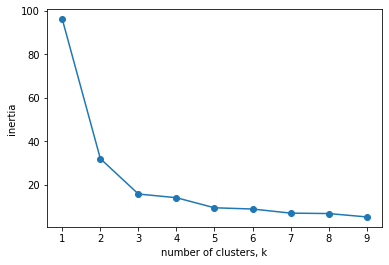

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

ks = range(1, 10)

inertias = []

for k in ks:

    model = KMeans(n_clusters=k, init="random", random_state=1)

    model.fit(X)

    inertias.append(model.inertia_)


# Plot ks vs inertias

plt.plot(ks, inertias, '-o')

plt.xlabel('number of clusters, k')

plt.ylabel('inertia')

plt.xticks(ks)

fig = plt.gcf()

plt.show()

fig.savefig('elbo_plot.png', bbox_inches='tight')

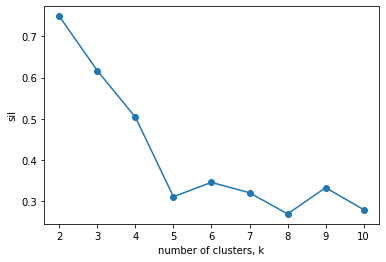

In [102]:
from sklearn.metrics import silhouette_score, silhouette_samples

sil = []
ks = range(2, 11)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in ks:
    kmeans = KMeans(n_clusters = k, init="random", random_state=1).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

plt.plot(ks, sil, '-o')

plt.xlabel('number of clusters, k')

plt.ylabel('sil')

plt.xticks(ks)

fig = plt.gcf()

plt.show()

fig.savefig('sil_plot.png', bbox_inches='tight')

For n_clusters = 2 The average silhouette_score is : 0.7486506152385615
For n_clusters = 3 The average silhouette_score is : 0.6164796912649254


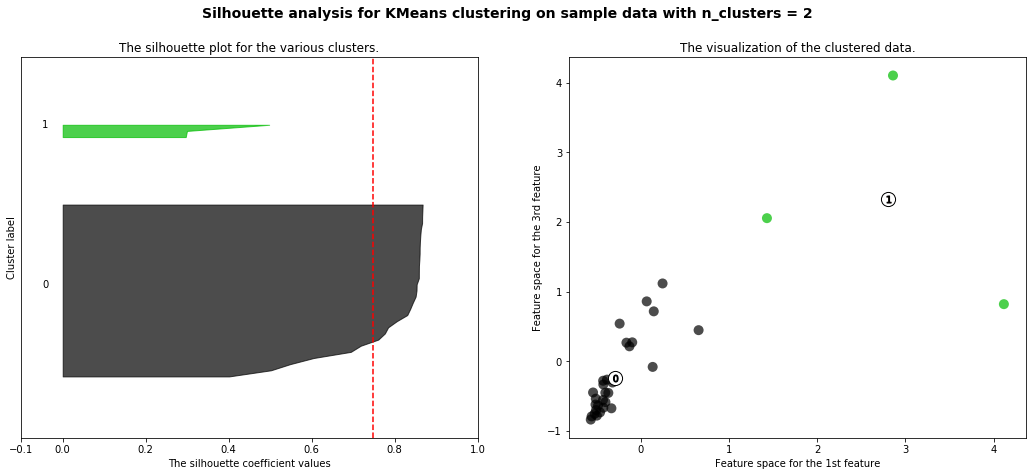

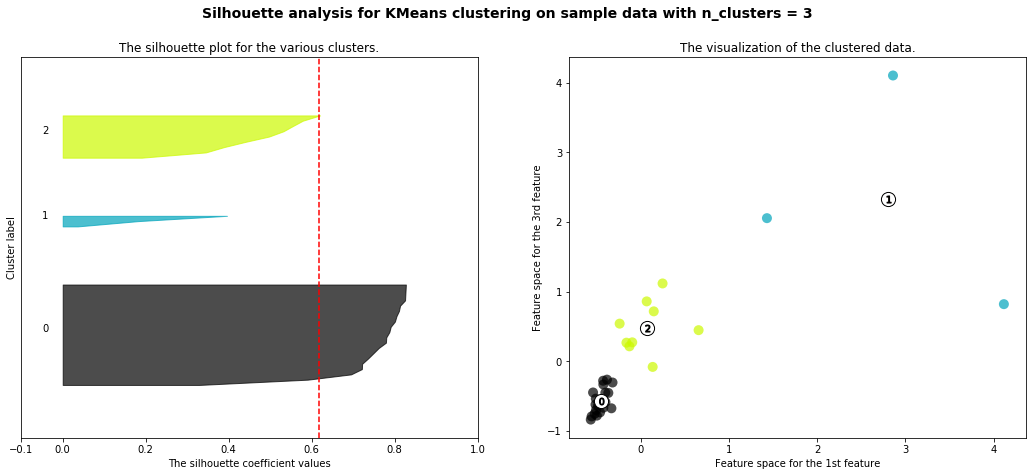

In [103]:
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='o', s=100, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.set_ylabel("Feature space for the 3rd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

fig = plt.gcf()
    
plt.show()

fig.savefig('sil_plot2.png')

In [89]:
# 법정동 좌표 불러와서 통합

xy_df = pd.read_excel('금융빅데이터공모전_데이터/행정_법정동 중심좌표.xlsx', sheet_name='합본 DB')

In [104]:
# 지도 시각화

import folium

merge_df = pd.merge(df, xy_df[xy_df.시도 == '서울특별시'], left_on='지역(동)', right_on='읍면동', how='left')
merge_df = merge_df[merge_df.코드종류 == 'H']

temp_df = merge_df.reset_index()
temp_df['XY'] = temp_df[['위도', '경도']].values.tolist()

temp_df.head()

,index,지역(동),군집,코드,시도,시군구,읍면동,하위,위도,경도,코드종류,XY
0,0,가회동,0,1111060000,서울특별시,종로구,가회동,NaN,37.582682,126.984831,H,"[37.582682, 126.984831]"
1,2,광희동,1,1114059000,서울특별시,중구,광희동,NaN,37.564445,127.005023,H,"[37.564445, 127.005023]"
2,3,교남동,0,1111058000,서울특별시,종로구,교남동,NaN,37.568547,126.964454,H,"[37.568546999999995, 126.964454]"
3,5,다산동,0,1114062500,서울특별시,중구,다산동,NaN,37.554398,127.008155,H,"[37.554398, 127.008155]"
4,6,동화동,0,1114066500,서울특별시,중구,동화동,NaN,37.560042,127.019399,H,"[37.560041999999996, 127.01939899999999]"


In [105]:
%matplotlib inline

map1 = folium.Map(location = [37.566535, 126.97796919999996], zoom_start = 12)  # 서울시청 중심
# search_nums = 30  # sum 기준 top 몇 개 볼지 설정

for index, row in temp_df.iterrows():  
    if row.군집 == 0:
        #folium.Marker(row.XY, popup=str(row['지역(동)']), icon=folium.Icon(color='green',icon='user')).add_to(map1)
        folium.CircleMarker(row.XY, radius=15, color='green',fill_color='green').add_to(map1)
    elif row.군집 == 1:
        #folium.Marker(row.XY, popup=str(row['지역(동)']), icon=folium.Icon(color='blue',icon='user')).add_to(map1)
        folium.CircleMarker(row.XY, radius=15, color='blue',fill_color='blue').add_to(map1)
    elif row.군집 == 2:
        #folium.Marker(row.XY, popup=str(row['지역(동)']), icon=folium.Icon(color='red',icon='star')).add_to(map1)
        folium.CircleMarker(row.XY, radius=15, color='red',fill_color='red').add_to(map1)
    #elif row.군집 == 3:
    #    folium.Marker(row.XY, popup=str(row['지역(동)']), icon=folium.Icon(color='black',icon='cloud')).add_to(map1)
    #else:
    #    folium.Marker(row.XY, popup=str(row['지역(동)']), icon=folium.Icon(color='white',icon='cloud')).add_to(map1)
        
    #if index >= search_nums:
    #    break
map1.save('map.html')
map1